# Invariant Mass Distribution of Dilepton Samples

For the first project, we will be finding the Higgs boson in the dilepton sample. To do this we will need to compute the invariant mass and perform a fit. 

In [19]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

inFileName = "../../Data/data_A.exactly2lep.root"
file = uproot.open(inFileName)

In [20]:
tree = b'mini;1'
branches = [ b'lep_pt', b'lep_eta', b'lep_phi', b'lep_E' ]
kins = {}
for branch in branches:
    kins[branch] = file[tree].array(branch)

In [21]:
GeVperMeV = 1./1000
kins[b'lep_px'] = kins[b'lep_pt']*np.cos( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_py'] = kins[b'lep_pt']*np.sin( kins[b'lep_phi']) * GeVperMeV
kins[b'lep_pz'] = kins[b'lep_pt']*np.sinh( kins[b'lep_eta']) * GeVperMeV
kins[b'lep_E'] = kins[b'lep_E'] * GeVperMeV

In [22]:
kins[b'lep_px_sum'] = np.array([ np.sum(i) for i in kins[b'lep_px'] ] )
kins[b'lep_py_sum'] = np.array([ np.sum(i) for i in kins[b'lep_py'] ] )
kins[b'lep_pz_sum'] = np.array([ np.sum(i) for i in kins[b'lep_pz'] ] )
kins[b'lep_pmag'] = np.sqrt(kins[b'lep_px_sum'] ** 2 + kins[b'lep_py_sum'] ** 2 + kins[b'lep_pz_sum'] ** 2)

In [23]:
kins[b'lep_E_sum'] = np.array([ np.sum(i) for i in kins[b'lep_E'] ] )

In [24]:
kins[b'lep_m2'] = kins[b'lep_E_sum']**2 - kins[b'lep_pmag']**2
bad_entries = np.where(kins[b'lep_m2']< 0)
for entry in bad_entries:
    kins[b'lep_m2'] = np.delete(kins[b'lep_m2'], entry, 0)

In [25]:
kins[b'inv_mass'] = np.sqrt( kins[b'lep_m2'] )

In [28]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

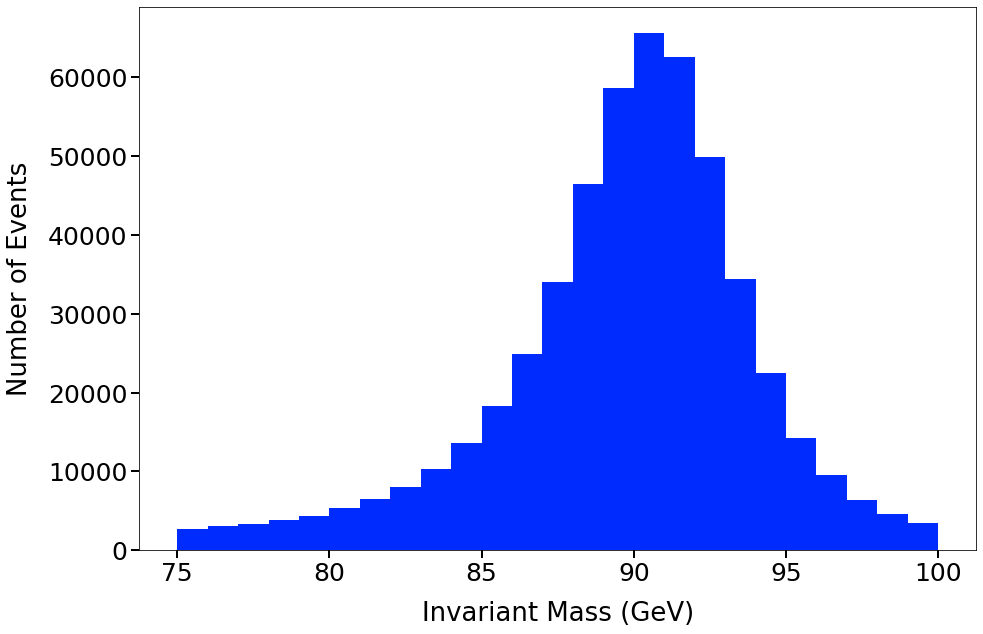

In [29]:
yTitle = "Number of Events"
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'inv_mass'], np.linspace(75,100,26))

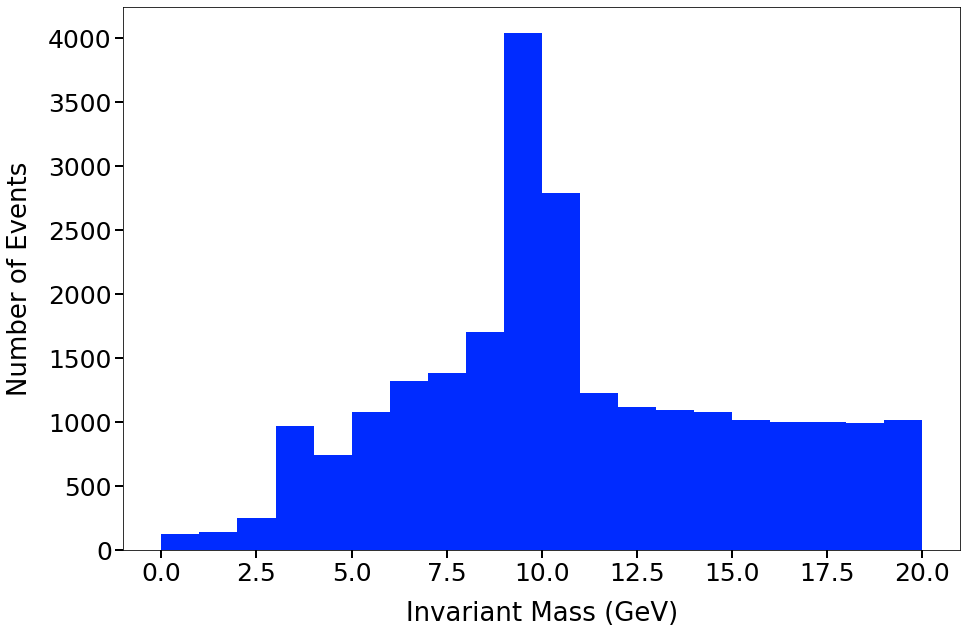

In [30]:
yTitle = "Number of Events"
fig, ax = make_fig(xTitle="Invariant Mass (GeV)",yTitle=yTitle)
n, bins, patches = ax.hist(kins[b'inv_mass'], np.linspace(0,20,21))